<a href="https://colab.research.google.com/github/Diksha-1901/forking-tutorial/blob/master/Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
data = np.load("candidate_dataset.npz")

print(data.files)


['x_train', 'y_train', 'x_val', 'y_val']


In [4]:
x_train = data["x_train"]
y_train = data["y_train"]
x_val = data["x_val"]
y_val = data["y_val"]

print("Train images:", x_train.shape)
print("Train labels:", y_train.shape)
print("Val images:", x_val.shape)
print("Val labels:", y_val.shape)

print("Unique classes:", np.unique(y_train))


Train images: (7007, 28, 28, 3)
Train labels: (7007, 1)
Val images: (1003, 28, 28, 3)
Val labels: (1003, 1)
Unique classes: [0 1 2 3 4 5 6]


In [6]:
print(y_train.shape)
print(type(y_train[0]))



(7007, 1)
<class 'numpy.ndarray'>


In [7]:
y_train = y_train.squeeze()
y_val = y_val.squeeze()


In [8]:
from collections import Counter

train_dist = Counter(y_train.tolist())
val_dist = Counter(y_val.tolist())

print("Train distribution:", train_dist)
print("Val distribution:", val_dist)


Train distribution: Counter({5: 2973, 4: 884, 2: 845, 1: 670, 0: 616, 3: 520, 6: 499})
Val distribution: Counter({5: 671, 4: 111, 2: 110, 1: 52, 0: 33, 6: 14, 3: 12})


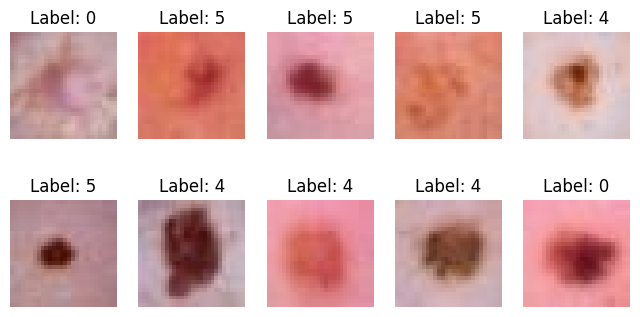

In [9]:
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


In [10]:
def preprocess_images(x):
    x = x.astype("float32") / 255.0
    x = np.expand_dims(x, axis=1)
    return x

x_train = preprocess_images(x_train)
x_val = preprocess_images(x_val)
